In [2]:
import sys
!{sys.executable} -m pip install mycolorpy

  Using cached mycolorpy-1.5.1.tar.gz (2.5 kB)
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3874 sha256=f30a50349ab7bd702aa677d1fcc0d3da394f20f0631cea95c7626875e38b03f2
  Stored in directory: /home/grishakl/.cache/pip/wheels/de/f6/20/d5f4361bb07416d18914807370aac98a7581f644cf18362df0
Successfully built mycolorpy


In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

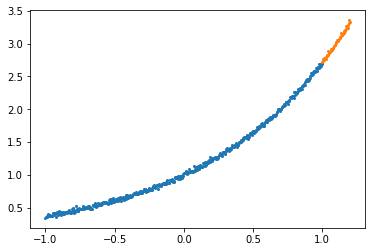

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [3]:
env = Environment(10, train_loader, train_epochs=50, validation_loader=val_loader)

cuda


In [4]:
env.train_epoch()
env.validate_entities()

[0.9885165882110595,
 0.1985965073108673,
 0.28835922479629517,
 0.7615299510955811,
 0.1452035927772522,
 0.02966156855225563,
 0.10485337674617767,
 0.03950123429298401,
 0.46943086624145514,
 0.14123281121253967]

In [6]:
for i in range(10):
    env.evo_step()
    env.train_epoch()
    env.validate_entities()
    print(f"Got {i+1} evo epoch")

/home/grishakl/.local/lib/python3.8/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Got 1 evo epoch
Got 2 evo epoch
Got 3 evo epoch
Got 4 evo epoch
Got 5 evo epoch
Got 6 evo epoch
Got 7 evo epoch
Got 8 evo epoch
Got 9 evo epoch
Got 10 evo epoch


ValueError: x and y must have same first dimension, but have shapes (11,) and (14,)

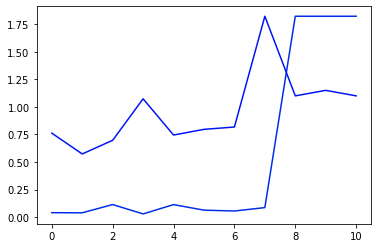

In [8]:
plot_env_history(env)

In [5]:
env.entities[1].entity_history

[0.1985965073108673]